In [47]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data/adult.csv.gz', compression='gzip', na_values='?')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


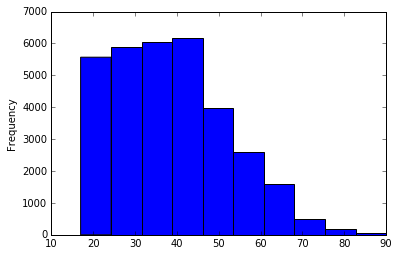

In [14]:
data['age'].plot(kind='hist')

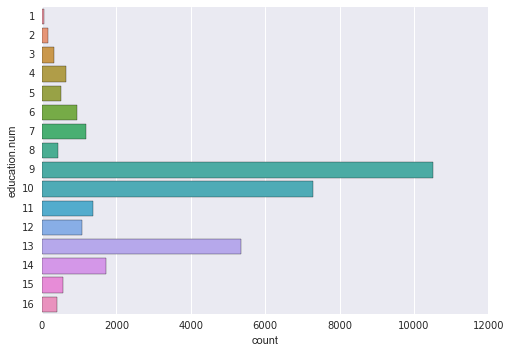

In [49]:
sns.countplot(y='education.num', data=data)

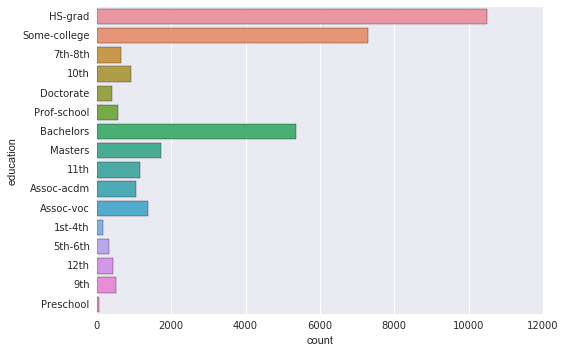

In [48]:
sns.countplot(y='education', data=data)

In [35]:
data['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

In [51]:
data['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'], dtype=object)

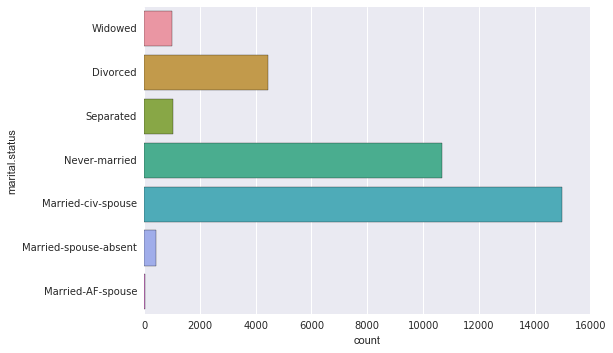

In [53]:
sns.countplot(y='marital.status', data=data)

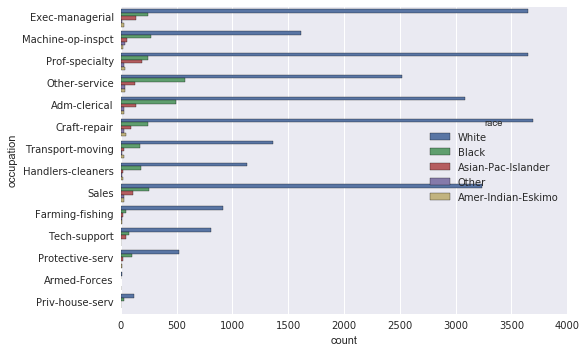

In [63]:
sns.countplot(y='occupation', hue='race', data=data)

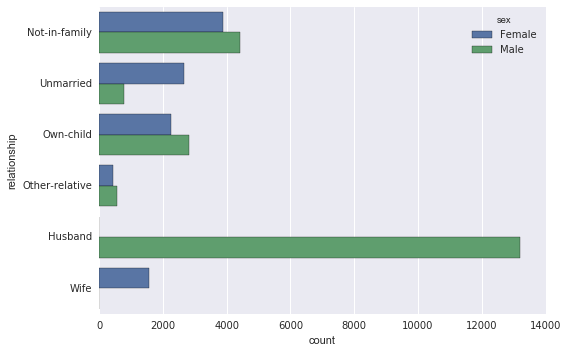

In [59]:
sns.countplot(y='relationship', hue='sex', data=data)

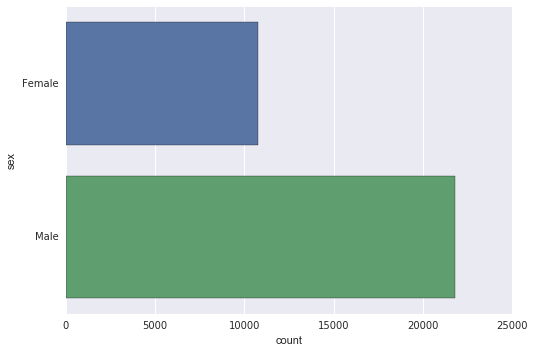

In [64]:
sns.countplot(y='sex', data=data)

In [70]:
data.dropna(inplace=True)

In [136]:
columns = ['age', 'workclass', 'education.num',
       'marital.status', 'occupation', 'relationship',
       'capital.gain', 'capital.loss', 'hours.per.week']

X = data[columns]
y = (data['income'] == '<=50K')

In [119]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship']

In [137]:
X_ = pd.get_dummies(X, columns=categorical)
print(X_.shape)
X_.head()

(30162, 39)


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
1,82,9,0,4356,18,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,4,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,9,0,3770,45,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,38,6,0,3770,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
print(y.shape)
y.sum()

(30162,)


22654

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_, y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print('{} std:{}'.format(scores.mean(), scores.std()))

0.5864158620827904 std:0.07131627830386497


In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_l = X.copy()
for c in categorical:
    X_l[c] = le.fit_transform(X[c])
    
X_l.head()

,age,workclass,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week
1,82,2,9,6,3,1,0,4356,18
3,54,2,4,0,6,4,0,3900,40
4,41,2,10,5,9,3,0,3900,40
5,34,2,9,0,7,4,0,3770,45
6,38,2,6,5,0,4,0,3770,40


In [123]:
X_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 10 columns):
age               30162 non-null int64
workclass         30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(clf, X_, y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print('{} std:{}'.format(scores.mean(), scores.std()))

0.8480294002101267 std:0.021580340830898034


In [114]:
def describeImportance(clf, X):
    indices = np.argsort(clf.feature_importances_)[::-1]
    for f in range(X.shape[1]):
        print('%d. feature %d %s (%f)' % (f + 1, indices[f], X.columns[indices[f]],
                                          clf.feature_importances_[indices[f]]))

In [140]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_l, y)
describeImportance(clf, X_l)

1. feature 0 age (0.212883)
2. feature 6 capital.gain (0.144412)
3. feature 5 relationship (0.141750)
4. feature 2 education.num (0.139494)
5. feature 8 hours.per.week (0.109537)
6. feature 4 occupation (0.088533)
7. feature 3 marital.status (0.067883)
8. feature 1 workclass (0.050986)
9. feature 7 capital.loss (0.044522)


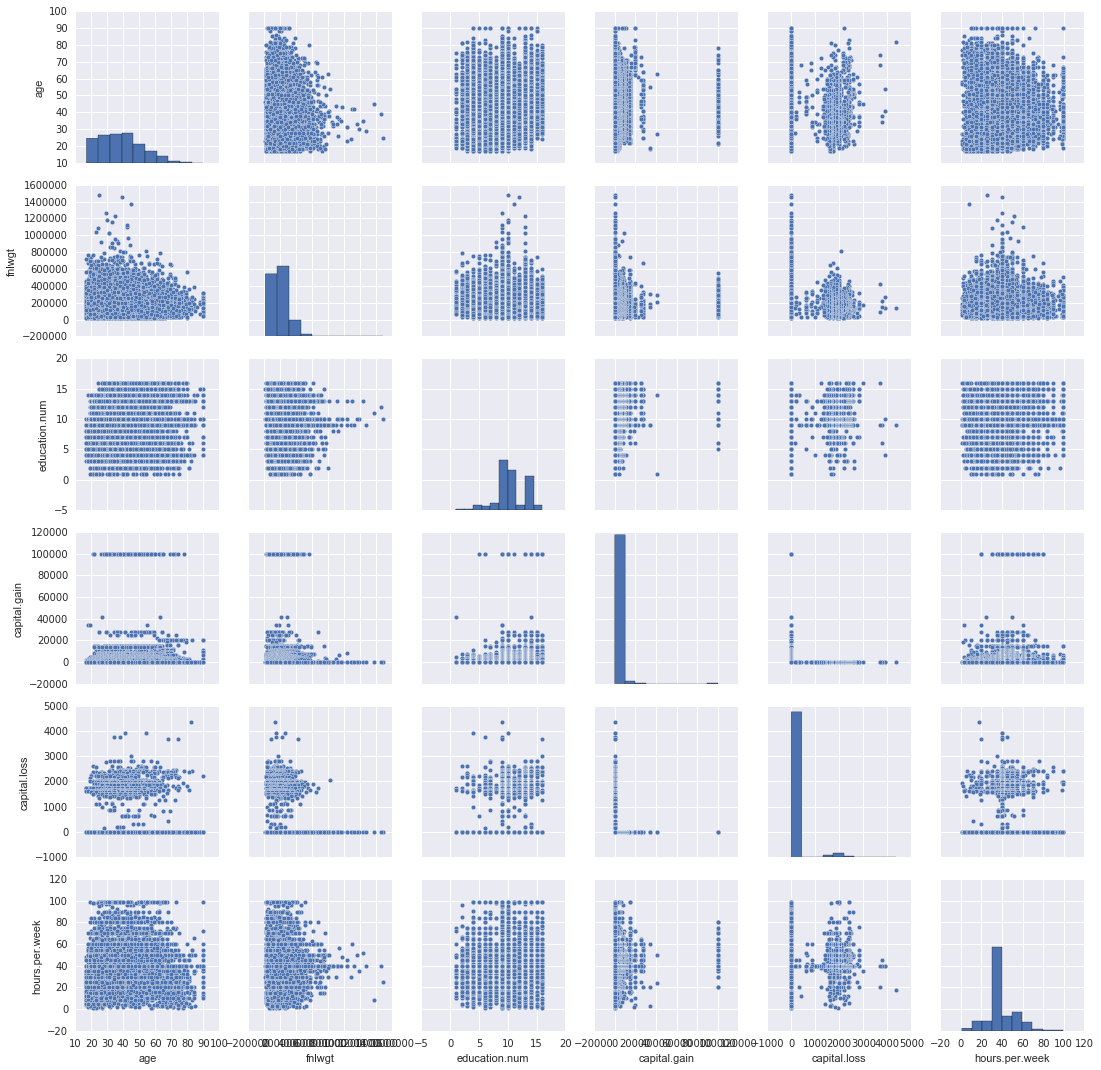

In [112]:
sns.pairplot(data)

In [147]:
from sklearn.manifold import TSNE

tsne = TSNE()
components = tsne.fit_transform(X_[X_['age'] >= 35][0:1000])

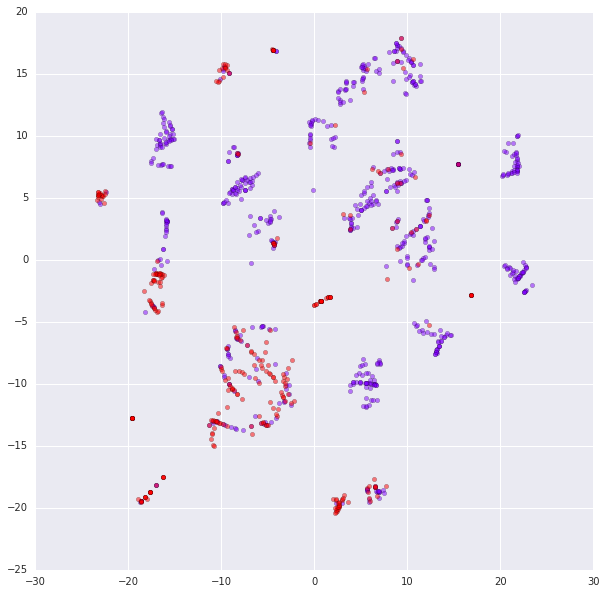

In [150]:
import matplotlib.cm as cm

plt.subplots(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, len(set(y))))
for y_, c in zip(set(y), colors):
    plt.scatter(components[y[:1000].values==y_, 0], 
                components[y[:1000].values==y_, 1], c=c, alpha=0.5, label=str(y_))